# ДЗ 8

In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Задача 1
`Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):`  
`zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],`  
`ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].`

`Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy.
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.`

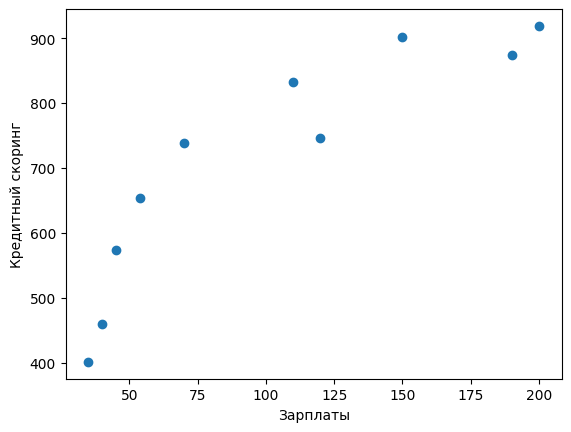

In [6]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.scatter(zp, ks)
plt.xlabel("Зарплаты")
plt.ylabel("Кредитный скоринг")
plt.show()

In [7]:

cov1 = np.mean(zp * ks) - np.mean(zp) * np.mean(ks) # ковариация по формуле
cov2 = np.cov(zp, ks, ddof=0) # ковариация с помощью функции

cov1, cov2

(9157.839999999997,
 array([[ 3494.64,  9157.84],
        [ 9157.84, 30468.89]]))

In [8]:
r1 = cov1 / np.std(zp, ddof=0) / np.std(ks, ddof=0) # коэфф. Пирсона по формуле
r2 = np.corrcoef(zp, ks) # коэфф. Пирсона с помощью numpy

df = pd.DataFrame({
    'sal' : zp,
    'ks' : ks
})
r3 = df['sal'].corr(df['ks']) # коэфф. Пирсона с помощью pandas

r1, r2, r3

(0.8874900920739158,
 array([[1.        , 0.88749009],
        [0.88749009, 1.        ]]),
 0.8874900920739162)

### Задача 2
`Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:`  
`131, 125, 115, 122, 131, 115, 107, 99, 125, 111.`

`Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.`

In [9]:
X = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
CL = 0.95 # довер. вероятность интервала

m = np.mean(X) # среднее по выборке
n = len(X)

se = np.std(X, ddof=1) / np.sqrt(n) # ошибка среднего
t = stats.t.ppf(1 - (1 - CL) / 2, df=(n - 1)) # критерий Стьюдента

ci = (
    m - t * se,
    m + t * se
)
ci

(110.55608365158724, 125.64391634841274)

### Задача 3
`Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.`

In [10]:
D = 25 # дисперсия генеральной совокупности
N = 27 # объём выборки
M = 174.2 # среднее по выборке
CL = 0.95 # довер. вероятность интервала

z = stats.norm.ppf(1 - (1 - CL) / 2) # z-критерий
se = np.sqrt(D / N)

ci = (
    M - z * se,
    M + z * se
)
ci

(172.3140237765397, 176.08597622346028)